In [2]:
import pandas as pd
import functions as func
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [72]:
from functions import clean_data, feature_engineering, train_model, plot_predictions


# Data Understanding



In [4]:
import pandas as pd
from IPython.display import display

# Paths to your two data files
tunis_dams_rain_data_path = '/Users/mehdisahraoui/Desktop/IronHackordner/Iron_Hack_Final_Project/Iron_Hack_Water_in_Tunisia/data/raw/tunis_dams_rain_mehdi.csv'
weather_data_path = '/Users/mehdisahraoui/Desktop/IronHackordner/Iron_Hack_Final_Project/Iron_Hack_Water_in_Tunisia/data/raw/weather.csv'

# Load the files
tunis_dams_rain_data = pd.read_csv(tunis_dams_rain_data_path)
weather_data = pd.read_csv(weather_data_path)

# Display a preview of each dataset
display(tunis_dams_rain_data.head())
display(weather_data.head())


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,SIDI AÏCH,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.201,2.4,3.255,0.293,2.822,9.820,1.604,4.608,NaN,NaN
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.201,2.4,2.201,0.134,1.549,8.170,1.491,3.558,NaN,NaN
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.201,2.4,1.590,0.140,0.924,7.100,1.413,2.789,NaN,NaN
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.201,2.4,0.998,1.116,1.882,12.562,1.209,4.705,NaN,NaN
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.201,2.4,3.215,0.285,2.770,9.735,1.599,4.584,NaN,NaN


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2014-01-01,6.8,1.3,14.7,0.0,NaN,273.0,19.3,NaN,NaN,NaN
1,2014-01-02,7.5,NaN,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,10.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-04,10.6,3.5,18.8,0.0,NaN,197.0,9.5,NaN,NaN,NaN
4,2014-01-05,11.7,8.9,20.0,0.0,NaN,NaN,9.2,NaN,NaN,NaN


In [74]:
# Step 2: Check for missing values
print("Checking for missing values in tunis_dams_rain_data:")
print(tunis_dams_rain_data.isnull().sum())

print("\nChecking for missing values in weather_data:")
print(weather_data.isnull().sum())


Checking for missing values in tunis_dams_rain_data:
date              0
MELLEGUE          0
BEN METIR         0
KASSEB            0
BARBARA           0
SIDI SALEM        0
BOU-HEURTMA       0
JOUMINE           0
GHEZALA           0
SEJNANE           0
S. EL BARRAK      0
SILIANA           0
LAKHMESS          0
RMIL              0
BIR M'CHERGA      0
RMEL              0
NEBHANA           0
SIDI SAAD         0
EL HAOUAREB       0
SIDI AÏCH         0
EL BREK           0
BEZIRK            0
CHIBA             0
MASRI             0
LEBNA             0
HMA               4
ABID              4
Zarga           755
Ziatine         755
dtype: int64

Checking for missing values in weather_data:
date       0
tavg       0
tmin      94
tmax      63
prcp     154
snow    1978
wdir     581
wspd     315
wpgt    1978
pres     960
tsun    1978
dtype: int64


In [11]:
# Step 3: Remove duplicates

# Remove duplicates in tunis_dams_rain_data
tunis_dams_rain_data_cleaned = tunis_dams_rain_data.drop_duplicates()

# Remove duplicates in weather_data
weather_data_cleaned = weather_data.drop_duplicates()

# Display the results to confirm duplicates have been removed
print("tunis_dams_rain_data after removing duplicates:")
display(tunis_dams_rain_data_cleaned.head())

print("\nweather_data after removing duplicates:")
display(weather_data_cleaned.head())


tunis_dams_rain_data after removing duplicates:


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,SIDI AÏCH,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.201,2.4,3.255,0.293,2.822,9.820,1.604,4.608,NaN,NaN
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.201,2.4,2.201,0.134,1.549,8.170,1.491,3.558,NaN,NaN
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.201,2.4,1.590,0.140,0.924,7.100,1.413,2.789,NaN,NaN
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.201,2.4,0.998,1.116,1.882,12.562,1.209,4.705,NaN,NaN
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.201,2.4,3.215,0.285,2.770,9.735,1.599,4.584,NaN,NaN



weather_data after removing duplicates:


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2014-01-01,6.8,1.3,14.7,0.0,NaN,273.0,19.3,NaN,NaN,NaN
1,2014-01-02,7.5,NaN,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,10.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-04,10.6,3.5,18.8,0.0,NaN,197.0,9.5,NaN,NaN,NaN
4,2014-01-05,11.7,8.9,20.0,0.0,NaN,NaN,9.2,NaN,NaN,NaN


In [13]:
# Step 4: Check data types

# Check data types in tunis_dams_rain_data
print("Data types in tunis_dams_rain_data:")
print(tunis_dams_rain_data_cleaned.dtypes)

# Check data types in weather_data
print("\nData types in weather_data:")
print(weather_data_cleaned.dtypes)


Data types in tunis_dams_rain_data:
date             object
MELLEGUE        float64
BEN METIR       float64
KASSEB          float64
BARBARA         float64
SIDI SALEM      float64
BOU-HEURTMA     float64
JOUMINE         float64
GHEZALA         float64
SEJNANE         float64
S. EL BARRAK    float64
SILIANA         float64
LAKHMESS        float64
RMIL            float64
BIR M'CHERGA    float64
RMEL            float64
NEBHANA         float64
SIDI SAAD       float64
EL HAOUAREB     float64
SIDI AÏCH       float64
EL BREK         float64
BEZIRK          float64
CHIBA           float64
MASRI           float64
LEBNA           float64
HMA             float64
ABID            float64
Zarga           float64
Ziatine         float64
dtype: object

Data types in weather_data:
date     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
snow    float64
wdir    float64
wspd    float64
wpgt    float64
pres    float64
tsun    float64
dtype: object


In [15]:
# Step 5: Preview cleaned datasets

# Preview the cleaned tunis_dams_rain_data
print("Preview of cleaned tunis_dams_rain_data:")
display(tunis_dams_rain_data_cleaned.head())

# Preview the cleaned weather_data
print("\nPreview of cleaned weather_data:")
display(weather_data_cleaned.head())


Preview of cleaned tunis_dams_rain_data:


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,SIDI AÏCH,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.201,2.4,3.255,0.293,2.822,9.820,1.604,4.608,NaN,NaN
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.201,2.4,2.201,0.134,1.549,8.170,1.491,3.558,NaN,NaN
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.201,2.4,1.590,0.140,0.924,7.100,1.413,2.789,NaN,NaN
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.201,2.4,0.998,1.116,1.882,12.562,1.209,4.705,NaN,NaN
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.201,2.4,3.215,0.285,2.770,9.735,1.599,4.584,NaN,NaN



Preview of cleaned weather_data:


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2014-01-01,6.8,1.3,14.7,0.0,NaN,273.0,19.3,NaN,NaN,NaN
1,2014-01-02,7.5,NaN,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,10.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-04,10.6,3.5,18.8,0.0,NaN,197.0,9.5,NaN,NaN,NaN
4,2014-01-05,11.7,8.9,20.0,0.0,NaN,NaN,9.2,NaN,NaN,NaN


In [17]:
# Step 6: Feature Engineering

# If 'date' exists in tunis_dams_rain_data, extract year, month, and day
if 'date' in tunis_dams_rain_data_cleaned.columns:
    tunis_dams_rain_data_cleaned['Year'] = pd.DatetimeIndex(tunis_dams_rain_data_cleaned['date']).year
    tunis_dams_rain_data_cleaned['Month'] = pd.DatetimeIndex(tunis_dams_rain_data_cleaned['date']).month
    tunis_dams_rain_data_cleaned['Day'] = pd.DatetimeIndex(tunis_dams_rain_data_cleaned['date']).day

# If 'date' exists in weather_data, extract year, month, and day
if 'date' in weather_data_cleaned.columns:
    weather_data_cleaned['Year'] = pd.DatetimeIndex(weather_data_cleaned['date']).year
    weather_data_cleaned['Month'] = pd.DatetimeIndex(weather_data_cleaned['date']).month
    weather_data_cleaned['Day'] = pd.DatetimeIndex(weather_data_cleaned['date']).day

# Example feature: Cumulative rainfall from tunis_dams_rain_data
if 'rainfall' in tunis_dams_rain_data_cleaned.columns:
    tunis_dams_rain_data_cleaned['Cumulative_Rainfall'] = tunis_dams_rain_data_cleaned['rainfall'].cumsum()

# Example feature: Daily temperature change in weather_data
if 'temperature' in weather_data_cleaned.columns:
    weather_data_cleaned['Temperature_Change'] = weather_data_cleaned['temperature'].diff()

# Display the updated datasets to verify the new features
print("Updated tunis_dams_rain_data with new features:")
display(tunis_dams_rain_data_cleaned.head())

print("\nUpdated weather_data with new features:")
display(weather_data_cleaned.head())


Updated tunis_dams_rain_data with new features:


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine,Year,Month,Day
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.293,2.822,9.820,1.604,4.608,NaN,NaN,2014,1,8
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.134,1.549,8.170,1.491,3.558,NaN,NaN,2014,1,9
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.140,0.924,7.100,1.413,2.789,NaN,NaN,2014,1,10
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,1.116,1.882,12.562,1.209,4.705,NaN,NaN,2014,1,12
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.285,2.770,9.735,1.599,4.584,NaN,NaN,2014,2,8



Updated weather_data with new features:


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Year,Month,Day
0,2014-01-01,6.8,1.3,14.7,0.0,NaN,273.0,19.3,NaN,NaN,NaN,2014,1,1
1,2014-01-02,7.5,NaN,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1,2
2,2014-01-03,10.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2014,1,3
3,2014-01-04,10.6,3.5,18.8,0.0,NaN,197.0,9.5,NaN,NaN,NaN,2014,1,4
4,2014-01-05,11.7,8.9,20.0,0.0,NaN,NaN,9.2,NaN,NaN,NaN,2014,1,5


In [19]:
#Date extraction: We extract the year, month, and day from the date column, if present.
#Cumulative calculations: We compute cumulative rainfall.
#Difference calculations: We calculate daily temperature change.

In [21]:
# Step: Fill NaN values with 0

# Fill all NaN values in tunis_dams_rain_data with 0
tunis_dams_rain_data_cleaned = tunis_dams_rain_data_cleaned.fillna(0)

# Fill all NaN values in weather_data with 0
weather_data_cleaned = weather_data_cleaned.fillna(0)

# Display the datasets after handling NaN values
print("tunis_dams_rain_data after handling NaN values (filled with 0):")
display(tunis_dams_rain_data_cleaned.head())

print("\nweather_data after handling NaN values (filled with 0):")
display(weather_data_cleaned.head())


tunis_dams_rain_data after handling NaN values (filled with 0):


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine,Year,Month,Day
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.293,2.822,9.820,1.604,4.608,0.0,0.0,2014,1,8
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.134,1.549,8.170,1.491,3.558,0.0,0.0,2014,1,9
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.140,0.924,7.100,1.413,2.789,0.0,0.0,2014,1,10
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,1.116,1.882,12.562,1.209,4.705,0.0,0.0,2014,1,12
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.285,2.770,9.735,1.599,4.584,0.0,0.0,2014,2,8



weather_data after handling NaN values (filled with 0):


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Year,Month,Day
0,2014-01-01,6.8,1.3,14.7,0.0,0.0,273.0,19.3,0.0,0.0,0.0,2014,1,1
1,2014-01-02,7.5,0.0,14.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014,1,2
2,2014-01-03,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014,1,3
3,2014-01-04,10.6,3.5,18.8,0.0,0.0,197.0,9.5,0.0,0.0,0.0,2014,1,4
4,2014-01-05,11.7,8.9,20.0,0.0,0.0,0.0,9.2,0.0,0.0,0.0,2014,1,5


In [23]:
#Filling all NaN values with 0: This code replaces all missing (NaN) values in both DataFrames (tunis_dams_rain_data_cleaned and weather_data_cleaned) with 0.
#This ensures that no missing data remains, which can be useful for models that don't handle missing values well.
#It prevents the distortion of any future calculations or analyses due to missing data.


In [25]:
# Step: Join the two datasets by the common attribute 'date'

# Merge the two datasets on the 'date' column
merged_data = pd.merge(tunis_dams_rain_data_cleaned, weather_data_cleaned, on='date', how='inner')

# Display the merged dataset
print("Merged dataset based on 'date':")
display(merged_data.head())


Merged dataset based on 'date':


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,prcp,snow,wdir,wspd,wpgt,pres,tsun,Year_y,Month_y,Day_y
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014,1,8
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.0,0.0,213.0,10.7,0.0,0.0,0.0,2014,1,9
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.0,0.0,0.0,8.3,0.0,0.0,0.0,2014,1,10
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014,1,12
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.0,0.0,66.0,16.4,0.0,0.0,0.0,2014,2,8


In [47]:
import os

# Step 1: Define the path to save the cleaned data
clean_data_path = '/Users/mehdisahraoui/Desktop/IronHackordner/Iron_Hack_Final_Project/Iron_Hack_Water_in_Tunisia/data/clean'

# Create the clean data directory if it doesn't exist
if not os.path.exists(clean_data_path):
    os.makedirs(clean_data_path)

# Step 2: Define the path to save the merged cleaned data
merged_data_path = os.path.join(clean_data_path, 'main.csv')

# Check if the file already exists
if not os.path.exists(merged_data_path):
    # Save the merged DataFrame to the clean folder only if the file doesn't exist
    merged_data.to_csv(merged_data_path, index=False)
    print(f"Cleaned and merged data has been saved to: {merged_data_path}")
else:
    print(f"The file '{merged_data_path}' already exists. Skipping saving.")


The file '/Users/mehdisahraoui/Desktop/IronHackordner/Iron_Hack_Final_Project/Iron_Hack_Water_in_Tunisia/data/clean/main.csv' already exists. Skipping saving.


In [29]:
#Handling NaN values: We filled NaNs with 0 to make the analysis consistent.
#Removing duplicates: We removed duplicate entries to avoid redundancy.
#Correct data types: Ensuring correct data types is crucial for accurate calculations, especially with date data.

In [49]:
#naming the new Data frame and saving it 

import os

# Path to save the cleaned data
clean_data_path = '/Users/mehdisahraoui/Desktop/IronHackordner/Iron_Hack_Final_Project/Iron_Hack_Water_in_Tunisia/data/clean'

# Create the clean data directory if it doesn't exist
if not os.path.exists(clean_data_path):
    os.makedirs(clean_data_path)

# Define the path to save the main data
main_data_path = os.path.join(clean_data_path, 'main.csv')

# Rename the merged dataframe to df_main
df_main = merged_data

# Ensure df_main exists
if 'df_main' in globals():
    # Save the df_main DataFrame to the clean folder
    df_main.to_csv(main_data_path, index=False)
    print(f"Main data has been saved to: {main_data_path}")
else:
    print("Error: 'df_main' is not defined. Make sure the DataFrame was successfully created.")


Main data has been saved to: /Users/mehdisahraoui/Desktop/IronHackordner/Iron_Hack_Final_Project/Iron_Hack_Water_in_Tunisia/data/clean/main.csv


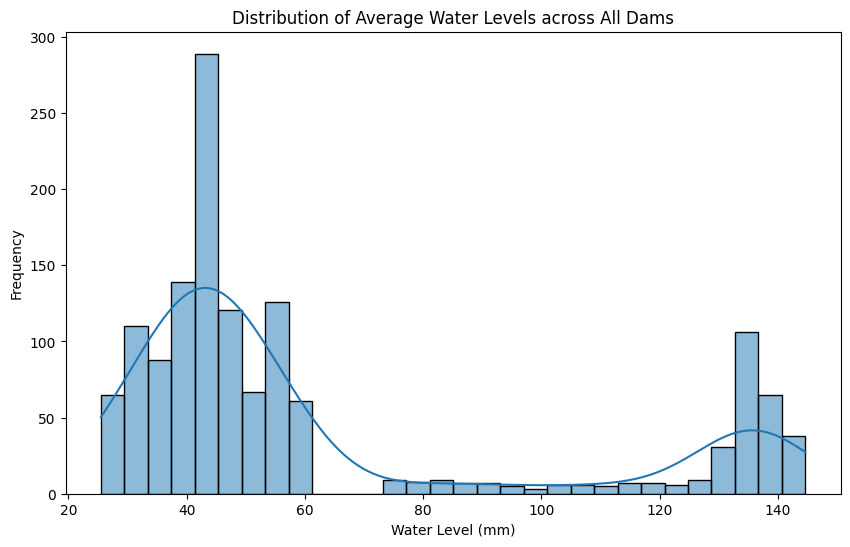

In [33]:
# Create a new column for the average water level across all dams
df_main['average_water_level'] = df_main[['MELLEGUE', 'BEN METIR', 'KASSEB', 'BARBARA']].mean(axis=1)

# Univariate Analysis for the average water level
plt.figure(figsize=(10, 6))
sns.histplot(df_main['average_water_level'], kde=True, bins=30)
plt.title('Distribution of Average Water Levels across All Dams')
plt.xlabel('Water Level (mm)')
plt.ylabel('Frequency')
plt.show()


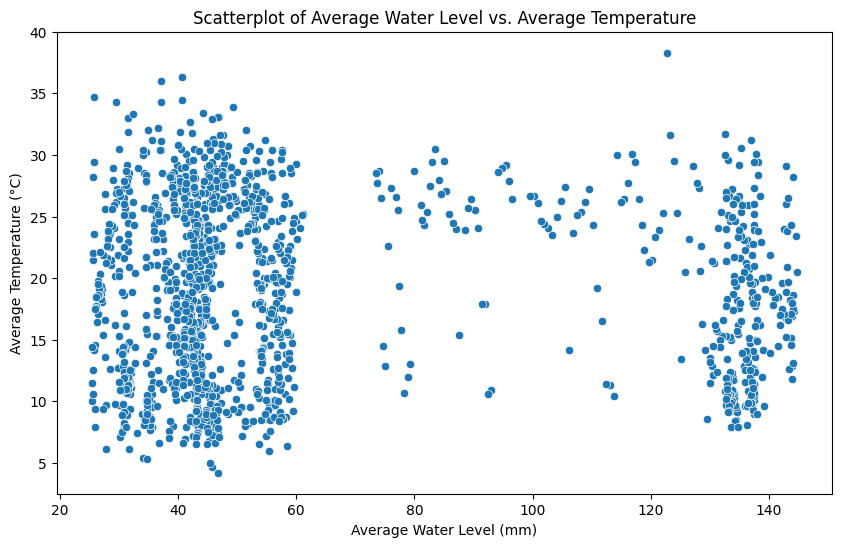

Correlation between average water level and temperature: -0.03499698214697164


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bivariate Analysis: Scatterplot between average water level and average temperature (tavg)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_water_level', y='tavg', data=df_main)
plt.title('Scatterplot of Average Water Level vs. Average Temperature')
plt.xlabel('Average Water Level (mm)')
plt.ylabel('Average Temperature (°C)')
plt.show()

# Calculate correlation between average water level and temperature
correlation = df_main['average_water_level'].corr(df_main['tavg'])
print(f'Correlation between average water level and temperature: {correlation}')


In [37]:
#Bivariate Analysis: We are visualizing the relationship between the average water level and the average temperature using a scatterplot.
#Correlation: We calculate the correlation coefficient between these two variables to check for a linear relationship.

In [39]:
##Multivariate Analyse

<Figure size 1200x1000 with 0 Axes>

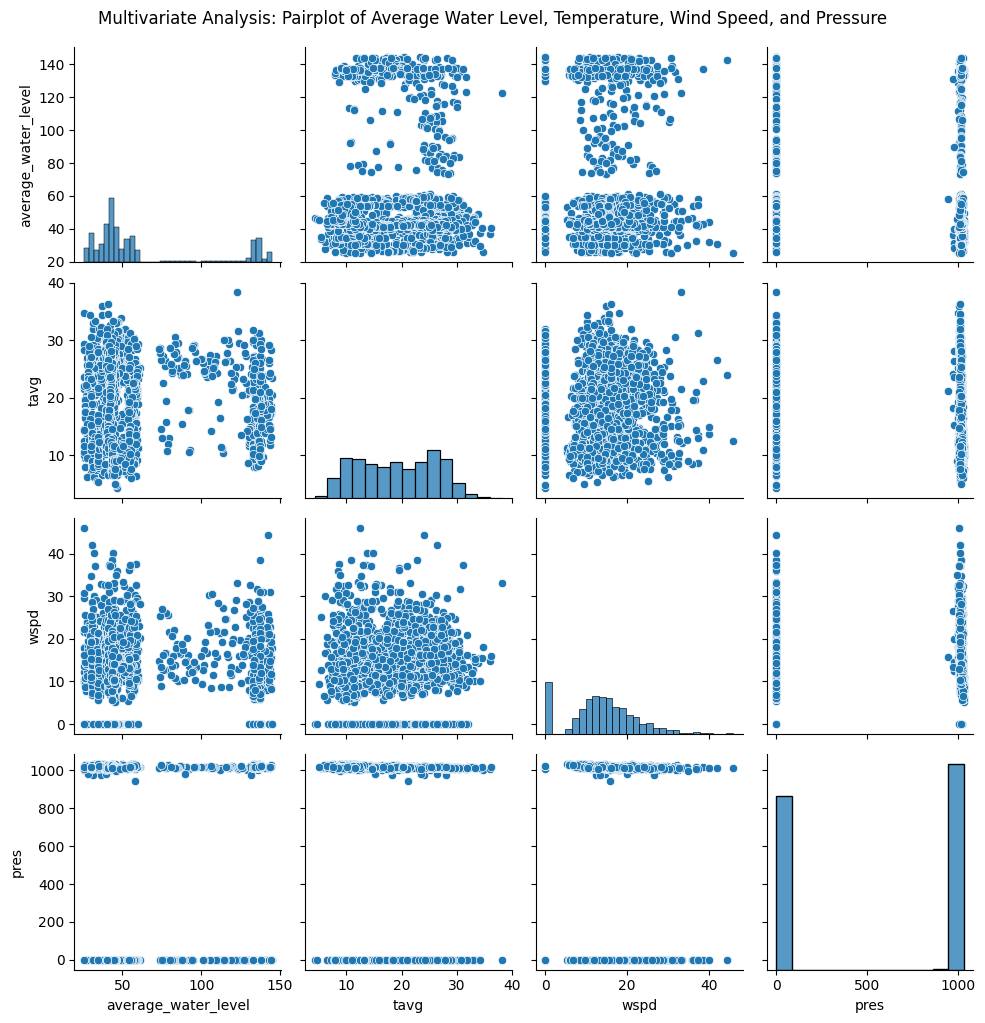

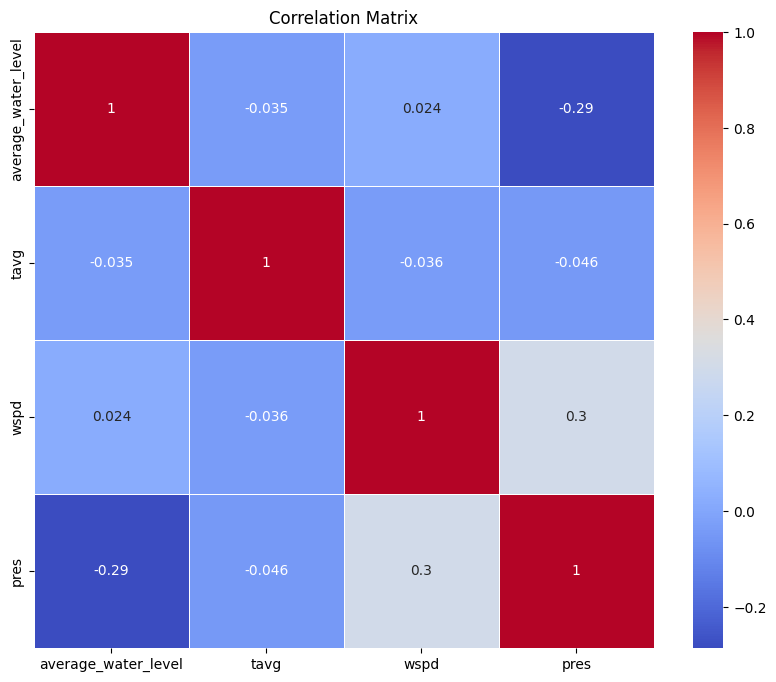

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged and cleaned dataset
df_main = pd.read_csv('/Users/mehdisahraoui/Desktop/IronHackordner/Iron_Hack_Final_Project/Iron_Hack_Water_in_Tunisia/data/clean/main.csv')

# Ensure 'average_water_level' exists
if 'average_water_level' not in df_main.columns:
    df_main['average_water_level'] = df_main[['MELLEGUE', 'BEN METIR', 'KASSEB', 'BARBARA']].mean(axis=1)

# Step 3: Multivariate Analysis

# Beispiel 1: Pairplot zur Visualisierung von Beziehungen zwischen mehreren Variablen
plt.figure(figsize=(12, 10))
sns.pairplot(df_main[['average_water_level', 'tavg', 'wspd', 'pres']])
plt.suptitle('Multivariate Analysis: Pairplot of Average Water Level, Temperature, Wind Speed, and Pressure', y=1.02)
plt.show()

# Beispiel 2: Heatmap der Korrelationsmatrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_main[['average_water_level', 'tavg', 'wspd', 'pres']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


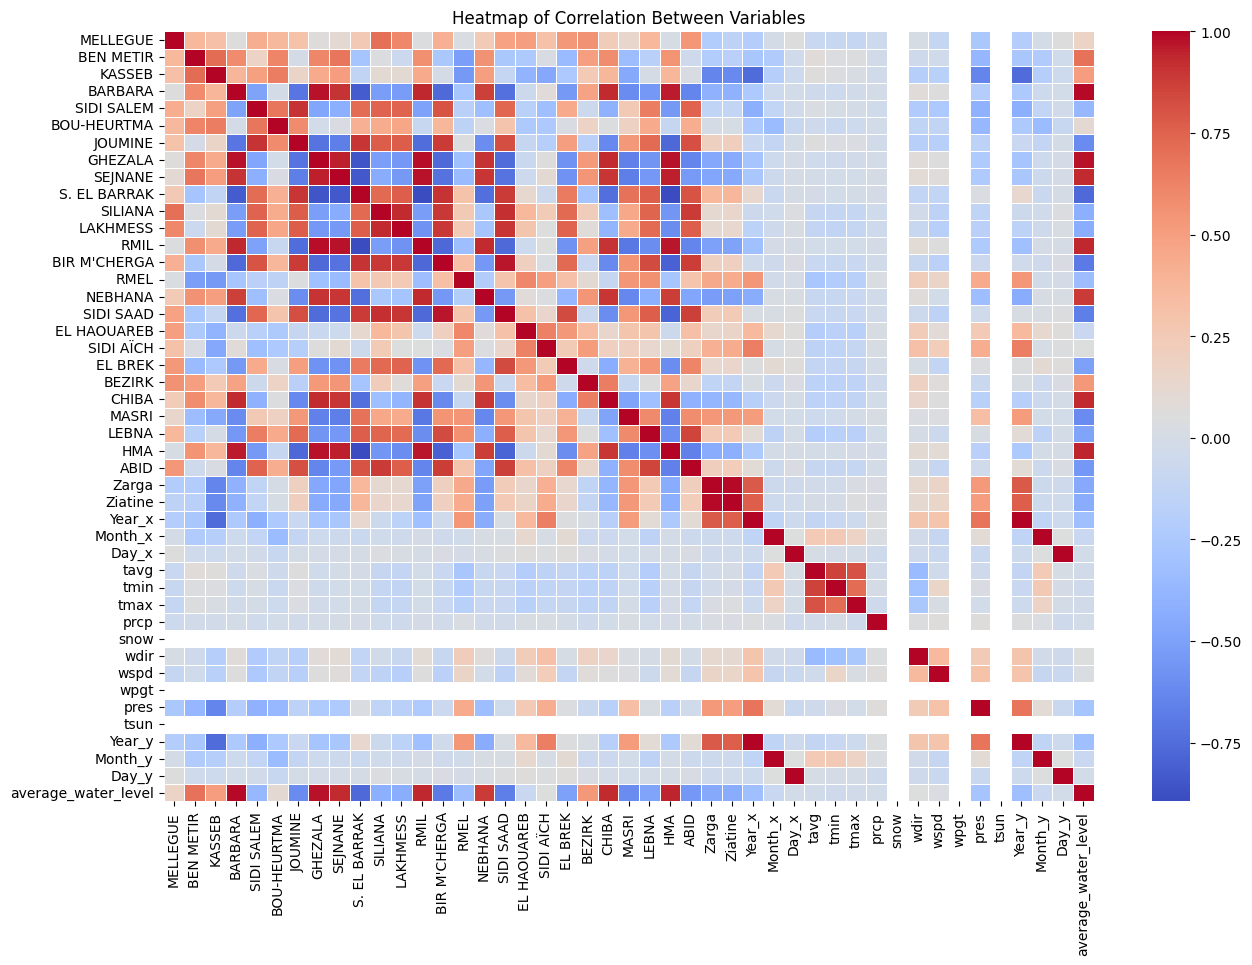

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the correlation matrix (already done)

# Step 2: Plot the heatmap with a larger figure size and without annotations
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5, annot=False)
plt.title('Heatmap of Correlation Between Variables')
plt.show()


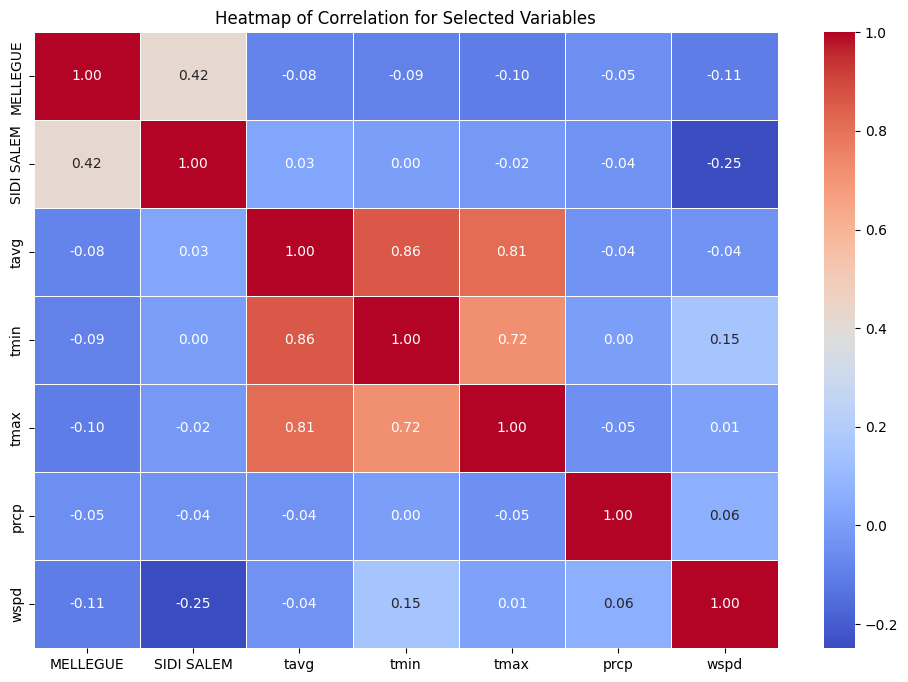

In [59]:
# Step 1: Select a subset of columns for correlation analysis
columns_of_interest = ['MELLEGUE', 'SIDI SALEM', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd']
subset_corr_matrix = df_main[columns_of_interest].corr()

# Step 2: Plot the heatmap with fewer variables
plt.figure(figsize=(12, 8))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Heatmap of Correlation for Selected Variables')
plt.show()


In [1]:
import sys
print(sys.executable)


/opt/anaconda3/envs/Water_Tunisia_env/bin/python


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Select features (X) and target variable (y)
X = main[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']]  # Example features
y = main['average_water_level']  # Target variable (replace with your column)

# Split data into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 6: Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 1526.2670400802328
R-squared (R²): -0.01691513006183354


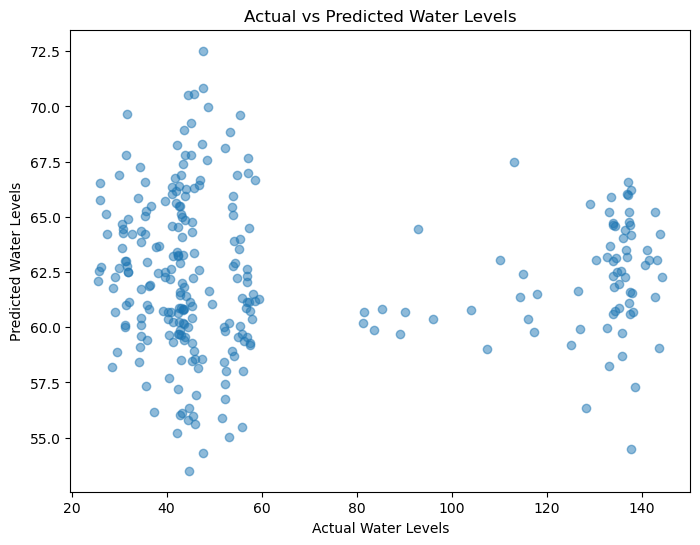

In [12]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Water Levels')
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.show()


Random Forest - Mean Squared Error: 1617.6096212843934
Random Forest - R² Score: -0.07777450159129384


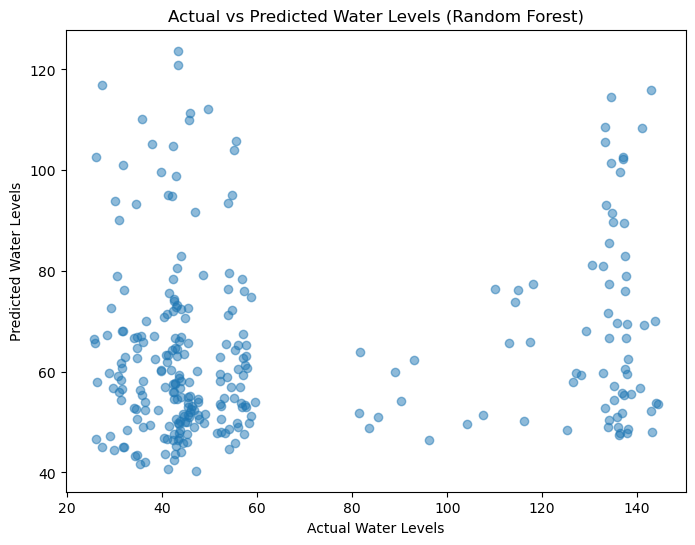

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select features (X) and target variable (y)
X = main[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']]  # Example features
y = main['average_water_level']  # Target variable

# Step 2: Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 4: Train the model
rf_model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Step 6: Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R² Score: {r2_rf}")

# Step 7: Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.title('Actual vs Predicted Water Levels (Random Forest)')
plt.show()


Gradient Boosting - Mean Squared Error: 1539.4328236666854
Gradient Boosting - R² Score: -0.025687175959830277


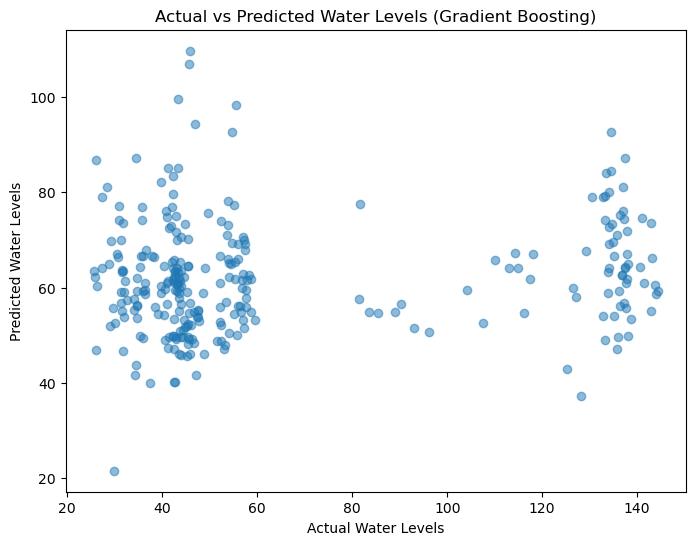

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

# Step 1: Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Step 2: Train the model
gb_model.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Step 4: Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting - R² Score: {r2_gb}")

# Step 5: Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.title('Actual vs Predicted Water Levels (Gradient Boosting)')
plt.show()


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Gradient Boosting model
gboost = GradientBoostingRegressor(random_state=42)

# Setup Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_gboost = grid_search.best_estimator_

# Output the best hyperparameters found
print(f"Best hyperparameters found: {best_params}")


Best hyperparameters found: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}


Tuned Gradient Boosting – Mean Squared Error: 1516.0451017307582
Tuned Gradient Boosting – R² Score: -0.010104497654025435


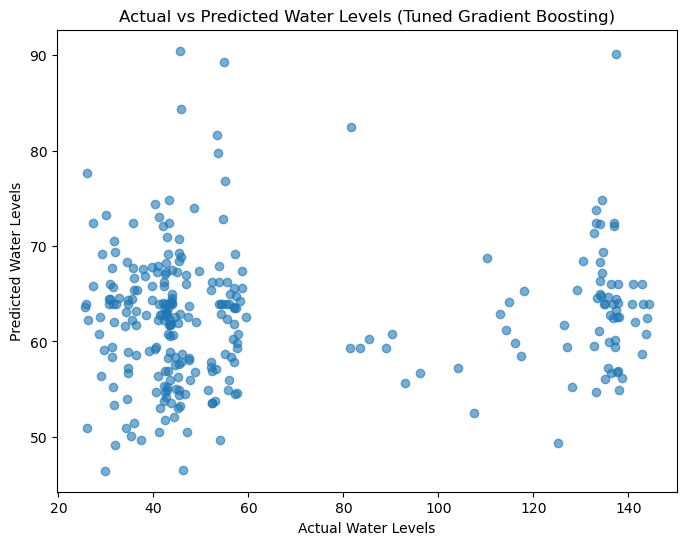

In [21]:
# Predict using the best Gradient Boosting model
y_pred_best_gboost = best_gboost.predict(X_test)

# Calculate the MSE and R^2 score
mse_best_gboost = mean_squared_error(y_test, y_pred_best_gboost)
r2_best_gboost = r2_score(y_test, y_pred_best_gboost)

# Print the results
print(f"Tuned Gradient Boosting – Mean Squared Error: {mse_best_gboost}")
print(f"Tuned Gradient Boosting – R² Score: {r2_best_gboost}")

# Plot Actual vs Predicted for the tuned model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best_gboost, alpha=0.6)
plt.title('Actual vs Predicted Water Levels (Tuned Gradient Boosting)')
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.show()



In [23]:
from sklearn.preprocessing import PolynomialFeatures

# Creating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

print(f"Original features shape: {X.shape}")
print(f"Transformed features shape: {X_poly.shape}")


Original features shape: (1400, 5)
Transformed features shape: (1400, 20)


In [27]:
from xgboost import XGBRegressor

# Train XGBoost Regressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb}, R² Score: {r2_xgb}")


XGBoost MSE: 2014.5643605640653, R² Score: -0.3422559256951836


In [42]:
#Hyperparameter Tuning (Full Grid Search)
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
}

grid_xgb = GridSearchCV(XGBRegressor(), param_grid_xgb, scoring='neg_mean_squared_error', cv=3)
grid_xgb.fit(X_train, y_train)

best_params_xgb = grid_xgb.best_params_
print(f"Best hyperparameters for XGBoost: {best_params_xgb}")


Best hyperparameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 100}


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Define the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(gbr_model, X, y, scoring='neg_mean_squared_error', cv=5)

# Print the mean and standard deviation of cross-validation scores
print(f"Mean CV MSE: {-cv_scores.mean()}, Std CV MSE: {cv_scores.std()}")


Mean CV MSE: 2084.046865407098, Std CV MSE: 1413.5468738923075


In [44]:
from sklearn.model_selection import cross_val_score

# Cross-validation with Gradient Boosting
cv_scores = cross_val_score(gbr_model, X, y, scoring='neg_mean_squared_error', cv=5)
print(f"Mean CV MSE: {-cv_scores.mean()}, Std CV MSE: {cv_scores.std()}")


Mean CV MSE: 2084.046865407098, Std CV MSE: 1413.5468738923075


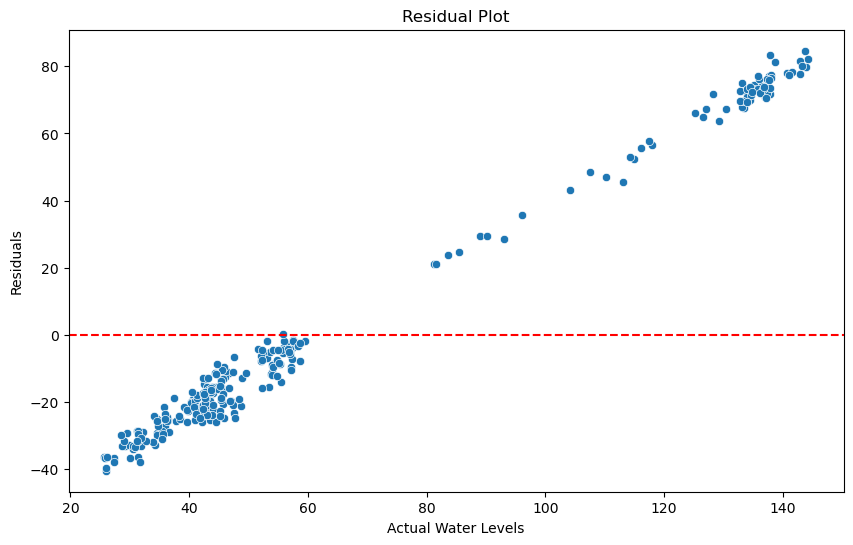

In [50]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred

# Pass x and y explicitly
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Water Levels')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


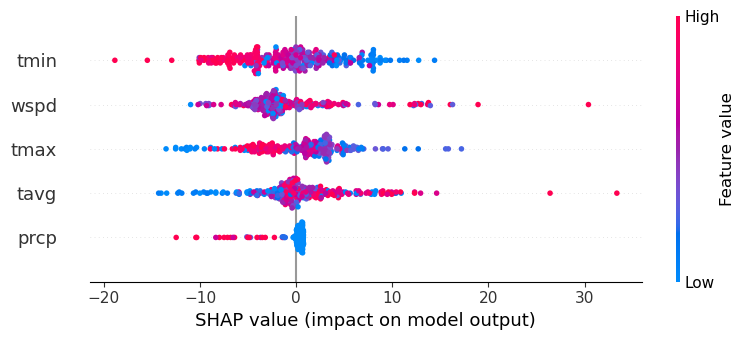

In [56]:
import shap

# SHAP summary plot for Gradient Boosting model
explainer = shap.TreeExplainer(gbr_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
